In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = 'DejaVu Sans'
sns.set_style('whitegrid')

## 2. 데이터 로드

In [4]:
# 주요 데이터셋
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
stores = pd.read_csv('stores.csv')
holidays = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
transactions = pd.read_csv('transactions.csv')
sample = pd.read_csv('sample_submission.csv')

print("\n=== 데이터셋 크기 ===")
print(f"Train: {train.shape}")
print(f"Test: {test.shape}")
print(f"Stores: {stores.shape}")
print(f"Holidays: {holidays.shape}")
print(f"Oil: {oil.shape}")
print(f"Transactions: {transactions.shape}")


=== 데이터셋 크기 ===
Train: (3000888, 6)
Test: (28512, 5)
Stores: (54, 5)
Holidays: (350, 6)
Oil: (1218, 2)
Transactions: (83488, 3)


## 3. Train 데이터 분석

In [5]:
print("\n=== Train 데이터 구조 ===")
print(train.head())
print("\n=== Train 정보 ===")
print(train.info())
print("\n=== Train 통계 ===")
print(train.describe())


=== Train 데이터 구조 ===
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

=== Train 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB
None

=== Train 통계 ===
                 id     store_nbr         sales   onpromotion
count  3.000888e+06  3.000888e+06  3.000888e+06  3.000888e+06
mean   1.500444e+06  2.750000e+01  3.577757e+02  2.602770e+00
s

In [6]:
# 결측치 확인
print("\n=== 결측치 확인 ===")
print(train.isnull().sum())


=== 결측치 확인 ===
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64


## 4. Test 데이터 분석

In [7]:
print("\n=== Test 데이터 구조 ===")
print(test.head())
print("\nTest 정보:")
print(test.info())


=== Test 데이터 구조 ===
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0

Test 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB
None


## 5. Stores 데이터 분석

In [8]:
print("\n=== Stores 데이터 ===")
print(stores.head())
print("\n=== 가게 유형 ===")
print(stores['type'].value_counts())
print("\n=== 가게 클러스터 ===")
print(stores['cluster'].value_counts().sort_index())


=== Stores 데이터 ===
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

=== 가게 유형 ===
type
D    18
C    15
A     9
B     8
E     4
Name: count, dtype: int64

=== 가게 클러스터 ===
cluster
1     3
2     2
3     7
4     3
5     1
6     6
7     2
8     3
9     2
10    6
11    3
12    1
13    4
14    4
15    5
16    1
17    1
Name: count, dtype: int64


## 6. 시간 정보 추출

In [9]:
# 날짜 파싱
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
transactions['date'] = pd.to_datetime(transactions['date'])

print("\n=== 시간 범위 ===")
print(f"Train: {train['date'].min()} ~ {train['date'].max()}")
print(f"Test: {test['date'].min()} ~ {test['date'].max()}")


=== 시간 범위 ===
Train: 2013-01-01 00:00:00 ~ 2017-08-15 00:00:00
Test: 2017-08-16 00:00:00 ~ 2017-08-31 00:00:00


## 7. 판매량 분포

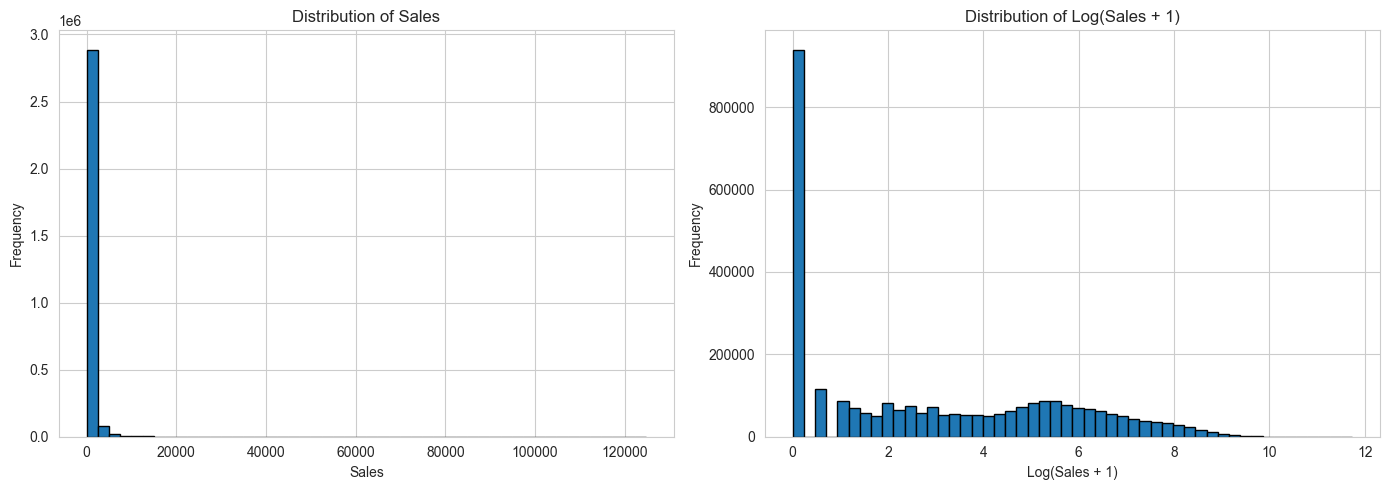


=== 판매량 통계 ===
최소: 0.0
최대: 124717.0
평균: 357.78
중앙값: 11.00


In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 판매량 히스토그램
axes[0].hist(train['sales'], bins=50, edgecolor='black')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Sales')

# 로그 스케일
axes[1].hist(np.log1p(train['sales']), bins=50, edgecolor='black')
axes[1].set_xlabel('Log(Sales + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Log(Sales + 1)')

plt.tight_layout()
plt.show()

print(f"\n=== 판매량 통계 ===")
print(f"최소: {train['sales'].min()}")
print(f"최대: {train['sales'].max()}")
print(f"평균: {train['sales'].mean():.2f}")
print(f"중앙값: {train['sales'].median():.2f}")

## 8. 시계열 패턴 분석

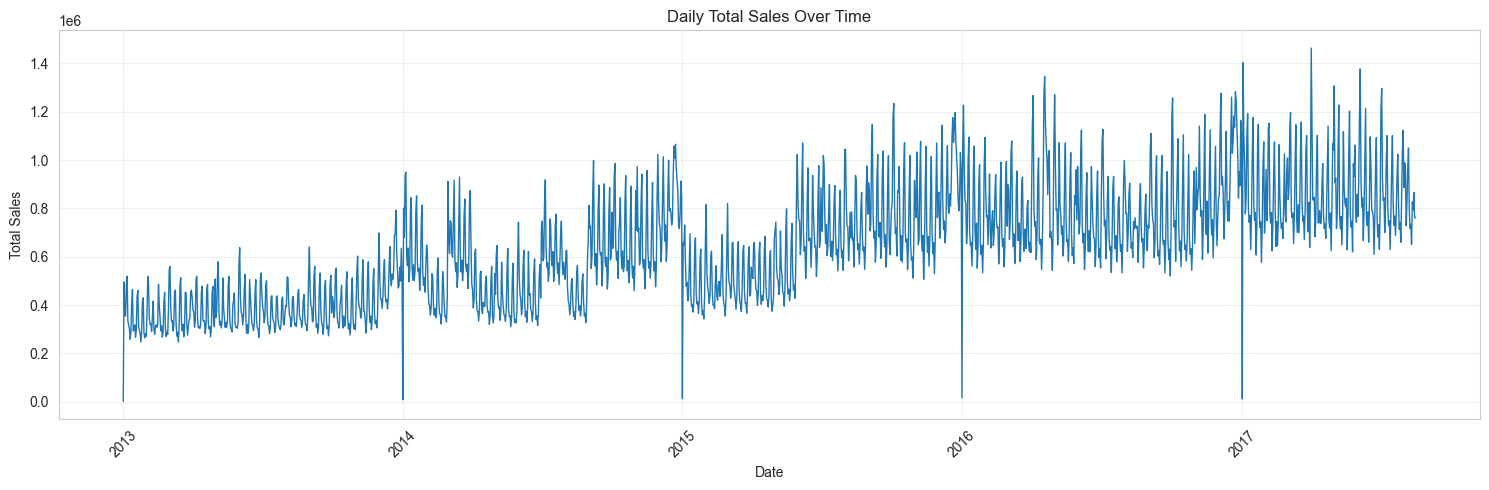

In [11]:
# 날짜별 일일 판매량
daily_sales = train.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
plt.plot(daily_sales['date'], daily_sales['sales'], linewidth=1)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Daily Total Sales Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 9. 가게별 판매량

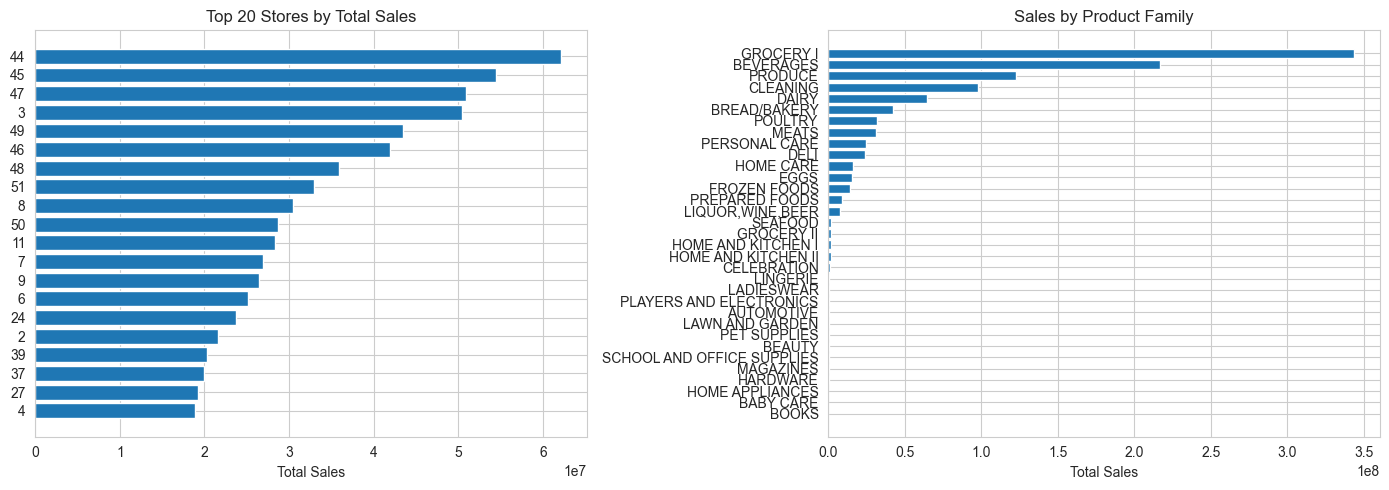

In [12]:
store_sales = train.groupby('store_nbr')['sales'].sum().reset_index().sort_values('sales', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 상위 20개 가게
axes[0].barh(store_sales.head(20)['store_nbr'].astype(str), store_sales.head(20)['sales'])
axes[0].set_xlabel('Total Sales')
axes[0].set_title('Top 20 Stores by Total Sales')
axes[0].invert_yaxis()

# 상품별 판매량
product_sales = train.groupby('family')['sales'].sum().reset_index().sort_values('sales', ascending=False)
axes[1].barh(product_sales['family'], product_sales['sales'])
axes[1].set_xlabel('Total Sales')
axes[1].set_title('Sales by Product Family')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## 10. Promotions 분석

In [13]:
print("\n=== Promotion 정보 ===")
print(f"총 행: {len(train)}")
print(f"프로모션 있는 행: {train['onpromotion'].sum()}")
print(f"프로모션 비율: {train['onpromotion'].sum() / len(train) * 100:.2f}%")

# 프로모션 여부에 따른 판매량
promo_stats = train.groupby('onpromotion')['sales'].agg(['mean', 'median', 'sum', 'count'])
print("\n=== 프로모션 여부에 따른 판매량 ===")
print(promo_stats)


=== Promotion 정보 ===
총 행: 3000888
프로모션 있는 행: 7810622
프로모션 비율: 260.28%

=== 프로모션 여부에 따른 판매량 ===
                    mean     median           sum    count
onpromotion                                               
0             158.246681     3.0000  3.781398e+08  2389559
1             467.556532   145.3480  8.161246e+07   174551
2             662.925632   245.3115  5.262701e+07    79386
3             871.408092   325.3910  3.996452e+07    45862
4             969.916135   346.0000  3.070657e+07    31659
...                  ...        ...           ...      ...
719          6681.000000  6681.0000  6.681000e+03        1
720          6154.000000  6154.0000  6.154000e+03        1
722          5846.000000  5846.0000  5.846000e+03        1
726          6044.000000  6044.0000  6.044000e+03        1
741          7517.000000  7517.0000  7.517000e+03        1

[362 rows x 4 columns]


## 11. Oil 가격 데이터


=== Oil 데이터 ===
        date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

결측치: 43 / 1218


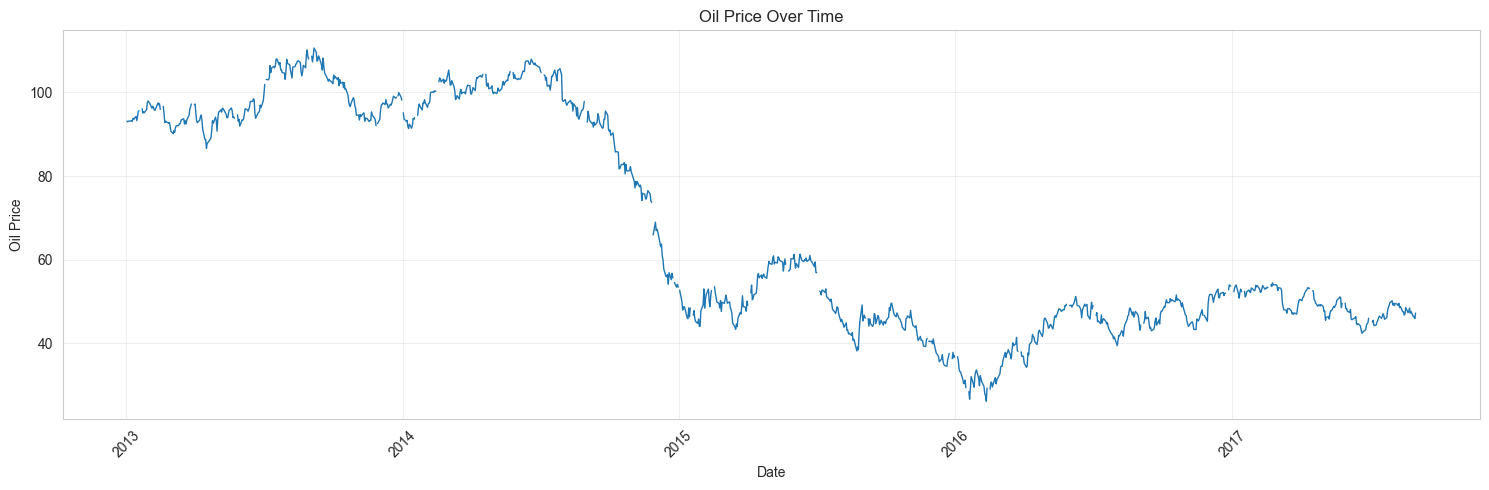

In [14]:
print("\n=== Oil 데이터 ===")
print(oil.head())
print(f"\n결측치: {oil['dcoilwtico'].isnull().sum()} / {len(oil)}")

plt.figure(figsize=(15, 5))
plt.plot(oil['date'], oil['dcoilwtico'], linewidth=1)
plt.xlabel('Date')
plt.ylabel('Oil Price')
plt.title('Oil Price Over Time')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 12. Holidays 이벤트

In [15]:
print("\n=== Holidays & Events ===")
print(holidays.head(10))
print(f"\n총 휴일/이벤트: {len(holidays)}")
print("\n=== 이벤트 타입 ===")
print(holidays['type'].value_counts())


=== Holidays & Events ===
        date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   
5 2012-05-12  Holiday     Local        Puyo         Cantonizacion del Puyo   
6 2012-06-23  Holiday     Local    Guaranda      Cantonizacion de Guaranda   
7 2012-06-25  Holiday  Regional    Imbabura  Provincializacion de Imbabura   
8 2012-06-25  Holiday     Local   Latacunga     Cantonizacion de Latacunga   
9 2012-06-25  Holiday     Local     Machala           Fundacion de Machala   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
5        Fal

## 13. Transactions 데이터


=== Transactions 데이터 ===
        date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922
5 2013-01-02          5          1903
6 2013-01-02          6          2143
7 2013-01-02          7          1874
8 2013-01-02          8          3250
9 2013-01-02          9          2940

=== Transactions 정보 ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB
None

결측치: 0 / 83488

=== 가게별 총 거래 건수 (상위 10) ===
    store_nbr  transactions
43         44       7273093
46        

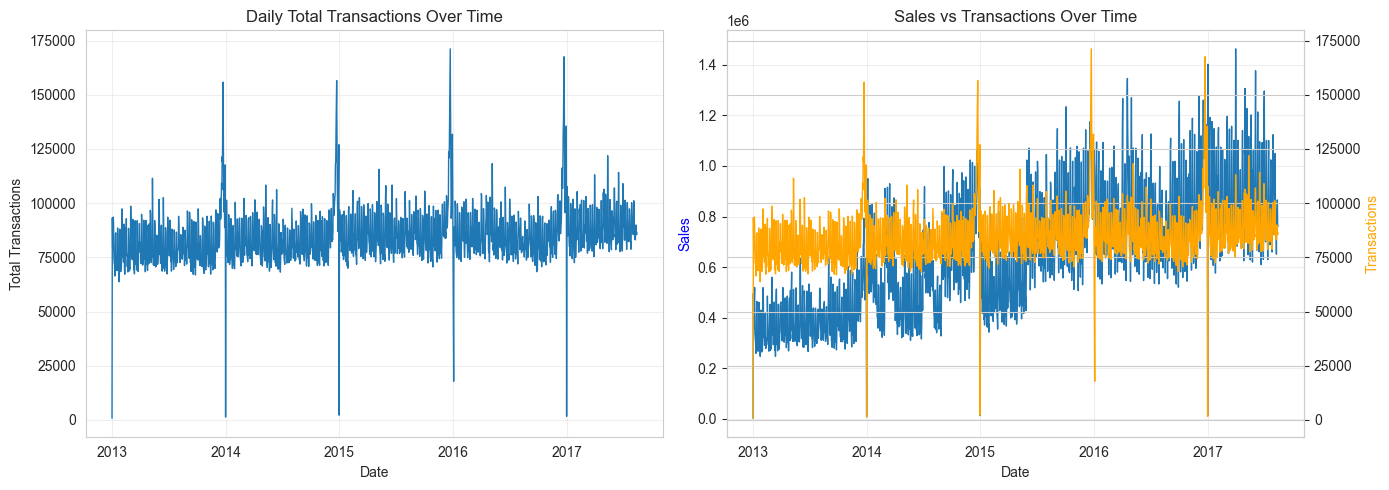


=== 판매량과 거래량 상관계수 ===
Pearson 상관계수: 0.6765


In [16]:
print("\n=== Transactions 데이터 ===")
print(transactions.head(10))
print("\n=== Transactions 정보 ===")
print(transactions.info())
print(f"\n결측치: {transactions['transactions'].isnull().sum()} / {len(transactions)}")

# 가게별 거래량
store_trans = transactions.groupby('store_nbr')['transactions'].sum().reset_index().sort_values('transactions', ascending=False)
print("\n=== 가게별 총 거래 건수 (상위 10) ===")
print(store_trans.head(10))

# 시간대별 거래량
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 시계열 거래량
daily_trans = transactions.groupby('date')['transactions'].sum().reset_index()
axes[0].plot(daily_trans['date'], daily_trans['transactions'], linewidth=1)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Total Transactions')
axes[0].set_title('Daily Total Transactions Over Time')
axes[0].grid(True, alpha=0.3)

# 판매량과 거래량 비교
daily_comp = daily_sales.merge(daily_trans, on='date')
ax2 = axes[1]
ax2.plot(daily_comp['date'], daily_comp['sales'], label='Sales', linewidth=1)
ax2_twin = ax2.twinx()
ax2_twin.plot(daily_comp['date'], daily_comp['transactions'], label='Transactions', color='orange', linewidth=1)
ax2.set_xlabel('Date')
ax2.set_ylabel('Sales', color='blue')
ax2_twin.set_ylabel('Transactions', color='orange')
ax2.set_title('Sales vs Transactions Over Time')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 판매량과 거래량의 상관관계
print("\n=== 판매량과 거래량 상관계수 ===")
correlation = daily_comp['sales'].corr(daily_comp['transactions'])
print(f"Pearson 상관계수: {correlation:.4f}")